In [1]:
import sys, os
from pathlib import Path
import yaml, json, io
import omnifig as fig
import h5py as hf
from datetime import datetime
from tqdm.notebook import tqdm
import torch
import omnilearn as learn
from omnilearn import util

import numpy as np
from scipy.spatial.distance import pdist, squareform

torch.set_printoptions(linewidth=120)

In [2]:
root = Path(r'C:\\Users\anwan\Documents\workspace\local_data')
# root = Path(r'C:\\Users\anwan\Documents\workspace\test_data')

In [4]:
oldpath = root / 'mpi3d' / 'mpi3d_complex.h5'
newpath = root / 'mpi3d' / 'mpi3d_complex_new.h5'

In [5]:
with hf.File(newpath, 'w') as dest:
    with hf.File(oldpath, 'r') as src:
        todo = tqdm(list(src.keys()))
        for k in todo:
            todo.set_description(k)
            dest.create_dataset(k, data=src[k][()])

  0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
f = hf.File(newpath, 'r')
list(f.keys())

['test_idx', 'test_images', 'train_idx', 'train_images']

In [7]:
f.close()

In [3]:
cat = 'realistic'

In [34]:
test_f = hf.File(root/'mpi3d'/f'mpi3d_{cat}_test.h5', 'r')
train_f = hf.File(root/'mpi3d'/f'mpi3d_{cat}_train.h5', 'r')

In [35]:
list(train_f.keys()), list(test_f.keys())

(['images', 'indices'], ['images', 'indices'])

In [36]:
train_f.create_dataset('train_idx', data=train_f['indices'][()])
train_f.create_dataset('train_images', data=train_f['images'][()])

train_f.create_dataset('test_idx', data=test_f['indices'][()])
train_f.create_dataset('test_images', data=test_f['images'][()])

del train_f['images']
del train_f['indices']

list(train_f.keys())

['test_idx', 'test_images', 'train_idx', 'train_images']

In [37]:
train_f.close()
test_f.close()

In [38]:
train_f = hf.File(root/'mpi3d'/f'mpi3d_{cat}_train.h5', 'r+')
print([(k,train_f[k].shape) for k in train_f.keys()])
train_f.close()

[('test_idx', (207360,)), ('test_images', (207360, 64, 64, 3)), ('train_idx', (829440,)), ('train_images', (829440, 64, 64, 3))]


In [6]:
# fig.quick_run('download-dataset', name='celeba', pbar={'_type':'progress-bar', 'display-on':'notebook'},
#              dataroot=r'C:/Users/anwan/Documents/workspace/test_data', )

In [3]:
dataset = fig.quick_run('load-data', name='3dshapes', dataroot=str(root))
len(dataset)

| dataset: None (by default)
| CREATING . (type=dataset)
|  > num_workers: 0 (by default)
|  > batch_size: 64 (by default)
|  > shuffle: True (by default)
|  > drop_last: False (by default)
|  > step_device --> device: 'cuda' (by default)
|  > infinite: False (by default)
|  > extractor: None (by default)
|  > allow_batched: True (by default)
|  > split: {} (by default)
|  > shuffle-split: True (by default)
|  > split-src: 'train' (by default)
|  > _dataset_type --> dataset-name --> name: '3dshapes'
|  > _dataset_mod: [] (by default)
|  > default_mode --> mode: 'train' (by default)
|  > mode-aliases: {} (by default)
|  > seed: 1585165814 (by default)
|  > din: None (by default)
|  > dout: None (by default)
|  > device: 'cuda' (by default)
|  > pin_memory: False (by default)
|  > epoch_seed --> seed: 1277982287 (by default)
|  > skip_load: False (by default)
|  > CREATING . (type=dataset/3dshapes)
|  >  > mode: 'train'
|  >  > labeled: False (by default)
|  >  > din: (3, 64, 64) (by def

384000

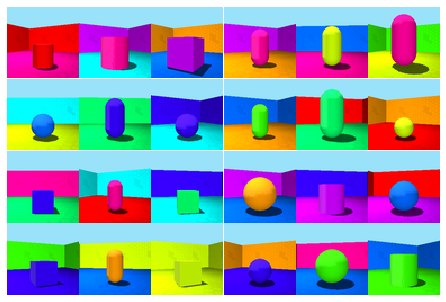

In [6]:
X, *other = dataset[torch.randint(len(dataset), size=(24,))]
util.show_imgs(X);

In [3]:
ID = '0B7EVK8r0v71pOXBhSUdJWU1MYUk'

In [4]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token is None:
        response.raise_for_status()
    
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [5]:
download_file_from_google_drive(ID, str(root/'test.txt'))

In [4]:
# fig.quick_run('download-dataset', name='celeba', pbar={'_type':'progress-bar', 'display-on':'notebook'},
#              dataroot=r'C:/Users/anwan/Documents/workspace/test_data', )

In [6]:
path = util.download_file_from_google_drive(ID, root, pbar=tqdm)

HTTPError: 403 Client Error: Forbidden for url: https://doc-0o-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/unm6hh9tmmjeror4d22bpc2jtufupsoe/1612658475000/13182073909007362810/*/0B7EVK8r0v71pOXBhSUdJWU1MYUk?e=download

In [10]:
import gdown

In [8]:
url = 'https://drive.google.com/file/d/0B7EVK8r0v71pOXBhSUdJWU1MYUk/view?usp=sharing'

In [11]:
output = root / 'test'
gdown.download(url, str(output), quiet=False)

C:\Users\anwan\Anaconda3\lib\site-packages\gdown\parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=0B7EVK8r0v71pOXBhSUdJWU1MYUk
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/file/d/0B7EVK8r0v71pOXBhSUdJWU1MYUk/view?usp=sharing
To: C:\Users\anwan\Documents\workspace\test_data\test
71.0kB [00:00, 1.03MB/s]


'C:\\Users\\anwan\\Documents\\workspace\\test_data\\test'

In [4]:
out = Path(r'C:/Users/anwan/Documents/workspace/test_data/README.txt')

In [6]:
out.name

'README.txt'

In [6]:
dataset = fig.quick_run('load-data', name='celeba', mode='test')
len(dataset)

| dataset: None (by default)
| CREATING . (type=dataset)
|  > num_workers: 0 (by default)
|  > batch_size: 64 (by default)
|  > shuffle: True (by default)
|  > drop_last: False (by default)
|  > step_device --> device: 'cuda' (by default)
|  > infinite: False (by default)
|  > extractor: None (by default)
|  > allow_batched: True (by default)
|  > split: {} (by default)
|  > shuffle-split: True (by default)
|  > split-src: 'train' (by default)
|  > _dataset_type --> dataset-name --> name: 'celeba'
|  > _dataset_mod: [] (by default)
|  > default_mode --> mode: 'test'
|  > mode-aliases: {} (by default)
|  > seed: 1615303137 (by default)
|  > din: None (by default)
|  > dout: None (by default)
|  > device: 'cuda' (by default)
|  > pin_memory: False (by default)
|  > epoch_seed --> seed: 3344601596 (by default)
|  > skip_load: False (by default)
|  > CREATING . (type=dataset/celeba)
|  >  > crop_size: 128 (by default)
|  >  > crop_loc: 'center' (by default)


MissingParameterError: dataroot

In [4]:
len(dataset)

96000

In [8]:
path = root / '3dshapes' / '3dshapes.h5'

In [9]:
f = hf.File(path)
list(f.keys())

C:\Users\anwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


['images', 'labels', 'test_idx', 'train_idx']

In [10]:
train = f['train_idx'][()]
test = f['test_idx'][()]
len(train), len(test)

(384000, 96000)

In [11]:
lbls = f['labels'][()]
lbls.shape

(480000, 6)

In [12]:
train_lbls = lbls[train]
train_lbls.shape

(384000, 6)

In [13]:
train_lbls.min(0)

array([  0.  ,   0.  ,   0.  ,   0.75,   0.  , -30.  ])

In [14]:
train_lbls.max(0)

array([ 0.9 ,  0.9 ,  0.9 ,  1.25,  3.  , 30.  ])

In [21]:
lbls = f['labels'][test[:1000]]
lbls.shape

(10000, 6)

In [18]:
lbls

array([[  0.        ,   0.        ,   0.        ,   0.75      ,
          0.        , -25.71428571],
       [  0.        ,   0.        ,   0.        ,   0.75      ,
          0.        , -12.85714286],
       [  0.        ,   0.        ,   0.        ,   0.75      ,
          1.        ,  -4.28571429],
       [  0.        ,   0.        ,   0.        ,   0.75      ,
          1.        ,   0.        ]])

In [10]:
path = root / '3dshapes.h5'

source_url = 'gs://3d-shapes/3dshapes.h5'

In [22]:
cmd = ['gsutil', 'cp', source_url, str(path)]

In [23]:
p = Popen(cmd, stdin=PIPE, stdout=PIPE, stderr=PIPE)
# output, err = p.communicate(b"input data that is passed to subprocess' stdin")
# rc = p.returncode

In [4]:
# subprocess.run(['gsutil', 'cp', source_url, str(path)])

In [5]:
path = list(root.glob('*'))[0]
path

WindowsPath('C:/Users/anwan/Documents/workspace/test_data/3dshapes.h5')

In [6]:
f = hf.File(path, 'r')
f.keys()

<KeysViewHDF5 ['images', 'labels']>

In [14]:
imgs, lbls = f['images'][()], f['labels'][()]
imgs.shape, lbls.shape

((480000, 64, 64, 3), (480000, 6))

In [15]:
im = f['images'][[1,2,4]]

In [19]:
f.close()

In [18]:
learn.__file__

'C:\\Users\\anwan\\OneDrive\\Khan\\research\\foundation\\omnilearn\\__init__.py'

In [7]:
'train_idx' in f

False

In [2]:
name = 'test-pycharm_210101-205647'
# name = 'test-cmd_200816-180714'


run = fig.quick_run('load-run', path=name)
run

| [Pushed] run._type: 'run'
| CREATING run (type=run)
|  > silent: False (by default)
|  > invisible: False (by default)
|  > path: 'test-pycharm_210101-205647'
|  > [Pushed] novel: False
|  > override: {} (by default)
|  > saveroot --> root: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets' (by default)
Loading Config: C:\Users\anwan\Documents\workspace\trained_nets\test-pycharm_210101-205647\config.yaml
|  > ckpt-num: None (by default)
|  > best: False (by default)
|  > last: True (by default)
|  > [Pushed] dataset._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_210101-205647\\ckpt2000'
|  > [Pushed] model._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_210101-205647\\ckpt2000'
|  > [Pushed] records._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_210101-205647\\ckpt2000'
|  > CREATING clock (type=clock)
|  >  > CREATING .stats (type=stats-manager)
|  >  >  > stat-collection-fmts: {} (

RUN:test-pycharm_210101-205647

In [3]:
model = run.get_model()
model

| CREATING .model (type=model)
|  > _model_mod: [] (by default)
|  > .seed: 0
|  > CREATING . (type=simple)
|  >  > CREATING net (type=multilayer)
|  >  >  > final_din --> ..din [list with 3 item/s]
|  >  >  >  > (0): 1
|  >  >  >  > (1): 32
|  >  >  >  > (2): 32
|  >  >  > final_dout --> ..dout: 10
|  >  >  > in_order: True (by default)
|  >  >  > force_iter: True (by default)
|  >  >  > ITERATOR layers [list with 4 item/s]
|  >  >  > CREATING 0 (type=conv-layer)
|  >  >  >  > in_shape --> din: (1, 32, 32)
|  >  >  >  > ..channels: 32
|  >  >  >  > out_shape --> dout: None
|  >  >  >  > ..down: 2
|  >  >  >  > pool: None (by default)
|  >  >  >  > kernel_size --> kernel: (3, 3) (by default)
|  >  >  >  > padding: 1 (by default)
|  >  >  >  > dilation: (1, 1) (by default)
|  >  >  >  > stride: (2, 2) (by default)
|  >  >  >  > ...norm: None
|  >  >  >  > ..nonlin: 'elu'
|  >  >  >  > conv_kwargs: {} (by default)
|  >  >  >  > residual: False (by default)
|  >  >  >  > force_res: False 

Simple_Model(
  (net): MultiLayer(
    (layers): ModuleList(
      (0): ConvLayer(
        residual=False
        (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (1): ConvLayer(
        residual=False
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (2): ConvLayer(
        residual=False
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (3): ConvLayer(
        residual=False
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (4): MLP(
        (0): Flatten(start_dim=1, end_dim=-1)
        (1): Linear(in_features=128, out_features=64, bias=True)
        (2): ELU(alpha=1.0, inplace=True)
        (3): Linear(in_features=64, out_fea

In [4]:
dataset = run.get_dataset()
dataset.switch_to('val')

| CREATING ...dataset (type=dataset)
|  > [Pushed] dataroot: 'C:\\Users\\anwan\\Documents\\workspace\\local_data'
|  > .num_workers: 0
|  > batch_size: 128
|  > shuffle: True
|  > drop_last: False
|  > .step_device --> .device: 'cuda'
|  > infinite: False (by default)
|  > extractor: None (by default)
|  > allow_batched: True (by default)
|  > split [dict with 1 item/s]
|  >  > (val): 0.1666666
|  > shuffle-split: True (by default)
|  > split-src: 'train' (by default)
|  > _dataset_type --> ident --> name: 'mnist'
|  > _dataset_mod: [] (by default)
|  > default_mode --> mode: 'train' (by default)
|  > .seed: 0
|  > .din [list with 3 item/s]
|  >  > (0): 1
|  >  > (1): 32
|  >  > (2): 32
|  > .dout: 10
|  > mode: 'train'
|  > device: 'cpu'
|  > pin_memory: True (by default)
|  > epoch_seed --> .seed: 0
|  > skip_load: False (by default)
|  > CREATING . (type=dataset/mnist)
|  >  > dataroot: 'C:\\Users\\anwan\\Documents\\workspace\\local_data'
|  >  > download: False
|  >  > mode: 'train

C:\Users\anwan\anaconda3\lib\site-packages\torch\nn\functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [5]:
len(dataset)

10000

In [8]:
batch = dataset.get_batch(device='cuda', batch_size=16)
batch.device

'cuda'

In [9]:
x,y = batch
# x, y = dataset[:16]
x.shape,y.shape

(torch.Size([16, 1, 32, 32]), torch.Size([16]))

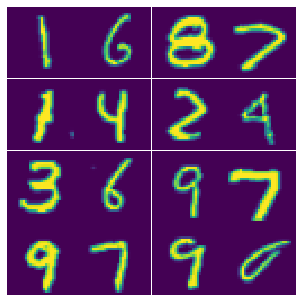

In [10]:
util.show_imgs(x)
pass

In [11]:
with torch.no_grad():
    pred = model(x)
pred

tensor([[ -1.5337,  14.5919,  -0.8643,  -2.2334,   2.3280,  -1.1418,  -0.8762,  -0.0673,   0.0700,  -0.0286],
        [  3.0704,   1.9342,  -7.3945,  -5.7670,   0.5566,   3.7781,  15.4643,  -6.8459,  -0.9463,  -6.0409],
        [ -1.1086,  -1.5420,  -0.0260,   1.9066,  -0.2900,   0.2199,  -1.5803,  -2.4479,  11.0436,   0.0834],
        [ -1.1137,  -1.6419,   2.7132,   1.0800,  -0.6695,  -2.6145,  -5.7460,   7.2278,  -1.5436,  -0.2688],
        [ -1.4902,  10.8545,  -0.7298,  -1.0958,   2.6491,  -1.0535,  -2.6165,   1.9898,  -0.0337,   1.2376],
        [ -7.9291,  -1.2377,  -2.2548,  -3.3297,  14.8150,  -2.7614,  -0.9944,  -1.8165,   1.2048,   0.4605],
        [ -0.8785,  -2.2396,  12.8958,   2.6297,  -0.3582,  -2.0306,  -4.1083,   4.1778,   1.0328,  -2.8605],
        [ -3.0447,  -3.1920,  -0.4444,  -2.5937,   7.0884,  -1.0311,  -0.6881,  -1.6629,  -1.8014,   1.6009],
        [-11.6971,  -1.1610,  -3.3830,  17.8660, -10.9078,   4.3356, -15.1093,   0.0547,  -5.8431,  -1.4804],
        [ 

In [13]:
pred.max(-1)[1]

tensor([1, 6, 8, 7, 1, 4, 2, 4, 3, 6, 9, 7, 9, 7, 9, 0], device='cuda:0')